In [13]:
import tensorflow as tf
import numpy as np
import random as rnd
import sklearn.svm as svm

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
number_circles = 5
number_points = 100000

radius_of_circles_array = [rnd.randint(1,5) for i in range(0,number_circles)]
x_center_point_circles = [rnd.randint(5,25) for i in range(0,number_circles)]
y_center_point_circles = [rnd.randint(5,25) for i in range(0,number_circles)]

x_points = [rnd.uniform(1,30) for i in range(0,number_points)]
y_points = [rnd.uniform(1,30) for i in range(0,number_points)]
x_distance =[[(x_points[i]-x_center_point_circles[u])**2 for i in range(0,number_points)] for u in range(0,number_circles)]
y_distance =[[(y_points[i]-y_center_point_circles[u])**2 for i in range(0,number_points)] for u in range(0,number_circles)]
z_points = np.asarray([[1 if ((x_distance[u][i]+y_distance[u][i])<radius_of_circles_array[u]) else 0 for i in range(0,number_points)] for u in range(0,number_circles)])
z_points_color = np.asarray([[1 if 1 in z_points[:,i] else 0] for i in range(0,number_points)])
X = np.asarray([x_points,y_points]).reshape(number_points,2)
Y = z_points_color
X_t = X
Y_t = Y

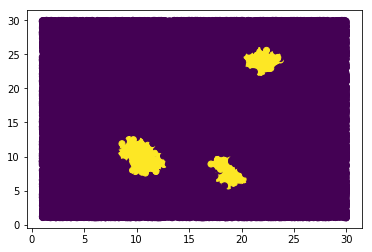

In [16]:
plt.scatter(x_points, y_points, c=z_points_color)
plt.show()

In [17]:
Y

array([[0],
       [0],
       [0],
       ..., 
       [0],
       [0],
       [0]])

In [18]:
input_size = 2
output_layer_size = 1
middle_size = 6

x = tf.placeholder(tf.float32,[None, input_size])

y_ = tf.placeholder(tf.float32,[None, output_layer_size])


W_layer1 = tf.Variable(tf.random_uniform([input_size,middle_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([middle_size]), name="b_layer1") 


W_layer2 = tf.Variable(tf.random_uniform([middle_size,middle_size], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([middle_size]), name="b_layer2")

W_layer3 = tf.Variable(tf.random_uniform([middle_size,output_layer_size], -1, 1), name="W_layer3")
b_layer3 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer3")

In [19]:
hidden1 = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
hidden2 = tf.nn.sigmoid(tf.matmul(hidden1,W_layer2)+b_layer2) #la de nuestra
y = tf.nn.sigmoid(tf.matmul(hidden2,W_layer3)+b_layer3) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [20]:
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva

In [21]:
sess.run(init) 

Ws = []

for i in range (1000):
    sess.run(train_step, feed_dict = {x: X, y_: Y})

In [22]:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

0.95755


In [23]:
print("Accuracy NN: ")
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

print("Accuracy RBF kernel: ")
sv3=svm.SVC(kernel='rbf')
sv3.fit(X, Y)
Y_svm3 = sv3.predict(X_t)
print(sv3.score(X_t,Y_t))

Accuracy NN: 
0.95755
Accuracy RBF kernel: 
0.95755
